## 06.비선형 활성화 함수(Activation function)

비선형 활성화 함수(Activation function)는 입력을 받아 수학적 변환을 수행하고 출력을 생성하는 함수이다. 앞서 배운 시그모이드 함수나 소프트맥스 함수는 대표적인 활성화 함수 중 하나이다.

이번 챕터에서는 인공 신경망의 은닉층에서 왜 활성화 함수로 시그모이드(sigmoid) 함수를 사용하는 것을 지양해야 하는지와 은닉층에서 주로 사용되는 함수인 렐루(ReLU) 함수를 소개하고 그 외의 다른 활성화 함수들에 대해서도 소개한다.

이번 챕터에서는 그래프를 직접 그리면서 이해해보겠다. 우선 아래의 도구들을 모두 임포트했다고 가정한다.



In [8]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용
plt.style.use(['seaborn-white'])

### 1.활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점이다. 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 한다. 예를 들어 $f(x) = Wx + b$라는 함수가 있을 때, W와 b는 상수이다. 이 식은 그래프를 그리면 직선이 그려진다. 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말한다.

인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 한다. 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없다. 예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정해보겠다. 활성화 함수는 $f(x) = Wx$라고 가정한다. 여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서 $y(x) = f(f(f(x)))$가 된다. 이를 식으로 표현하면 $W × W × W × x$이다. 그런데 이는 잘 생각해보면 $W$의 세제곱값을 $k$라고 정의해버리면 $y(x) = kx$와 같이 다시 표현이 가능하다. **즉, 선형 함수로는 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이를 줄 수 없다.** 

선형 함수를 사용한 은닉층을 1회 추가한 것과 연속으로 추가한 것이 차이가 없다는 뜻이지, 선형 함수를 사용한 층이 아무 의미가 없다는 뜻이 아니다. 학습 가능한 가중치가 새로 생긴다는 점에서 분명히 의미가 있다. 이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현하기도 한다. 활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)이다.



### 2.시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수를 사용한 어떤 인공 신경망이 있다고 가정해보겠다.

<img src = 'https://wikidocs.net/images/page/60683/simple-neural-network.png' width = 60%>

위 인공 신경망의 학습 과정은 다음과 같다. 우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(loss)을 미분을 통해서 기울기(gradient)를 구하고 구하고, 이를 통해 역전파(back propagation)를 수행한다.

그리고 시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생한다.



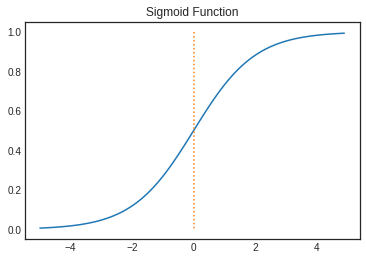

In [9]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 시그모이드 함수의 그래프를 보여준다. 위 그래프는 시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있다. 기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠다.

<img src = 'https://wikidocs.net/images/page/60683/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C%ED%95%A8%EC%88%982.PNG' width = 60%>

주황색 부분은 기울기를 계산하면 0에 가까운 아주 작은 값이 나오게 된다. 그런데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 된다. 이러한 현상을 **기울기 소실(Vanishing Gradient) 문제**라고 한다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 된다. 다시 말해 매개변수 $W$가 업데이트 되지 않아 학습이 되지를 않는다.

<img src = 'https://wikidocs.net/images/page/60683/%EA%B8%B0%EC%9A%B8%EA%B8%B0_%EC%86%8C%EC%8B%A4.png' width = 60%>

위의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만, 앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여준다. 결론적으로 시그모이드 함수를 은닉층에서 사용하는 것은 지양된다.


### 3.하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환한다. 그래프를 그려보겠다.



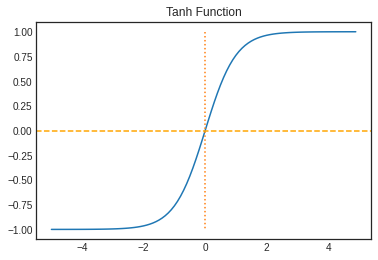

In [10]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, -1.0], ':')
plt.axhline(y = 0, color = 'orange', linestyle = '--')
plt.title('Tanh Function')
plt.show()

하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생한다. 그러나 하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 크다. 그래서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이다. 그래서 은닉층에서 시그모이드 함수보다는 많이 사용된다.

### 4.렐루 함수(ReLU)

인공 신경망에서 가장 최고의 인기를 얻고 있는 함수이다. 수식은 $f(x) = max(0, x)$로 아주 간단하다.



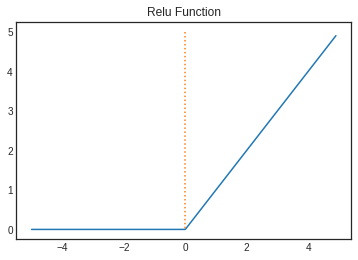

In [11]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환한다. 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동한다. 뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠르다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 된다. 그리고 이 뉴런은 다시 회생하는 것이 매우 어렵다. 이 문제를 **죽은 렐루(dying ReLU)**라고 한다.

### 5.리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개한다. Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있다.

수식은 $f(x) = max(ax, x)$로 아주 간단하다. a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가진다. 여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있다. 

In [12]:
a = 0.1

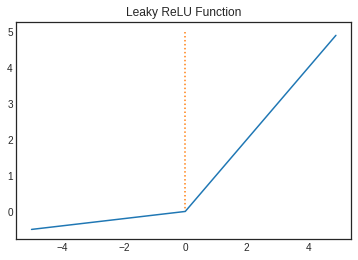

In [13]:
def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5.0, 0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않는다.

### 6.소프트맥스 함수(Softmax function)

은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 그렇다고 해서 앞서 배운 시그모이드 함수나 소프트맥스 함수가 사용되지 않는다는 의미는 아니다. 분류 문제는 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용한다.

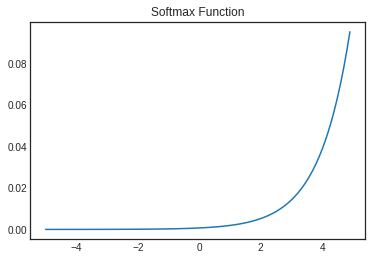

In [14]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용된다.

### 7.출력층의 활성화 함수와 오차 함수의 관계

은닉층의 활성화 함수로는 ReLU 또는 Leaky ReLU와 같은 ReLU의 변형을 사용하라고 정리해봤다. 그렇다면 출력층은 어떨까? 각 문제에 따른 출력층의 활성화 함수와 비용 함수의 관계를 정리해보면 다음과 같다. 이 외에도 다중 레이블 분류도 있지만 여기서는 다루지 않겠다. 

|문제	|활성화 함수	|비용 함수
|--|--|--
|이진 분류	|시그모이드	|nn.BCELoss()
|다중 클래스 분류	|소프트맥스	|nn.CrossEntropyLoss()
|회귀	|없음	|MSE

주의할 점은 nn.CrossEntropyLoss()는 소프트맥스 함수를 이미 포함하고 있다.

참고 자료 : https://excelsior-cjh.tistory.com/177

* 시그모이드 함수의 또 다른 문제점은 원점 중심이 아니라는 점이다(Not zero-centered). 따라서, 평균이 0이 아니라 0.5이며, 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높다. 이것을 편향 이동(bias shift)이라 하며, 이러한 이유로 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활성화 함수의 출력이 0이나 1로 수렴하게 되어 기울기 소실 문제가 일어날 수 있다.

* 하이퍼볼릭탄젠트 함수는 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동은 일어나지 않는다. 하지만, 하이퍼볼릭탄젠트 함수 또한 입력의 절대값이 클 경우 -1이나 1로 수렴하게 되는데 시그모이드 함수와 마찬가지로 이때 기울기가 완만해지므로 역시나 기울기 소실 문제가 일어날 수 있다.

* 스탠포드 대학교의 딥러닝 강의 cs231n에서는 ReLU를 먼저 시도해보고, 그 다음으로 LeakyReLU나 ELU 같은 ReLU의 변형들을 시도해보며, sigmoid는 사용하지 말라고 권장한다.

